We will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets
will help gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs.

In [1]:
import pandas as pd
import numpy as np
import scipy.io
from pprint import pformat
import matplotlib.pyplot as plt
%matplotlib inline


<h3> Linear Kernel

We will begin by with a 2D example dataset which can be separated by a linear boundary

In [71]:
data1_dict = scipy.io.loadmat('ex6/ex6data1.mat')
x = data1_dict['X']
y= data1_dict['y']

In [75]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 5)

Populating the interactive namespace from numpy and matplotlib


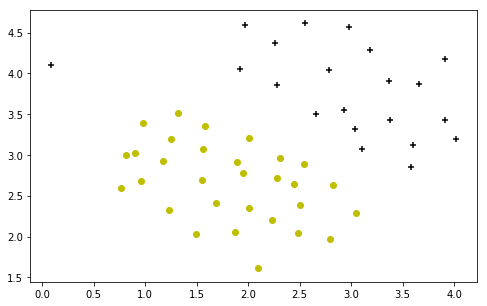

In [66]:
def plotdata(x,y):
    data = np.c_[x,y]
    pos = data[data[:,2]==1]
    neg = data[data[:,2]==0]
    plt.scatter(pos[:,0],pos[:,1],c='k',marker='+')
    plt.scatter(neg[:,0],neg[:,1],c='y',marker='o')
plotdata(x,y)

We will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that
controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. 


In [72]:
from sklearn import svm
clf = svm.SVC(C=1,kernel='linear')
clf.fit(x,y.reshape(len(x)))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
def printdecisionboundry(x,classifier):
    xx = np.arange(x[:,0].min(),x[:,0].max(),0.05)
    yy = np.arange(x[:,1].min(),x[:,1].max(),0.05)
    xx, yy = np.meshgrid(xx,yy)
    zz = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    zz = zz.reshape(xx.shape)
    plt.contour(xx,yy,zz,[0],colors='r')

In [70]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 5)

Populating the interactive namespace from numpy and matplotlib


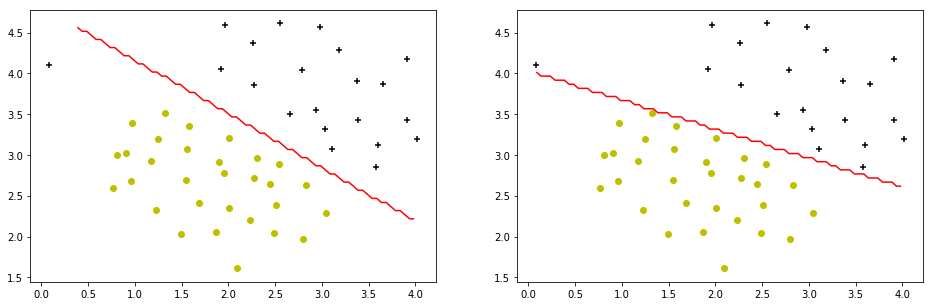

In [74]:
plt.subplot(1,2,1)
plotdata(x,y)
printdecisionboundry(x,clf)
clf = svm.SVC(C=100,kernel='linear')
clf.fit(x,y)
plt.subplot(1,2,2)
plotdata(x,y)
printdecisionboundry(x,clf)

<h3> RBF kernel

Now, we will be using SVMs to do non-linear classification. In particular, we will be using SVMs with Gaussian kernels on
datasets that are not linearly separable.

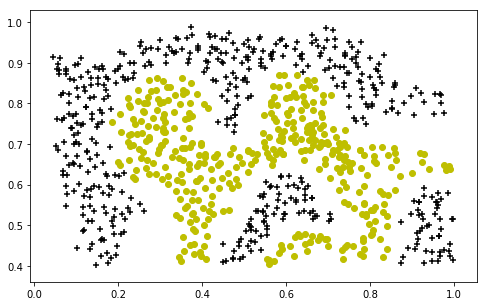

In [76]:
data1_dict = scipy.io.loadmat('ex6/ex6data2.mat')
x = data1_dict['X']
y= data1_dict['y']
plotdata(x,y)

In [77]:
clf = svm.SVC(C=1,kernel='rbf',gamma=50)
clf.fit(x,y.reshape(len(x)))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

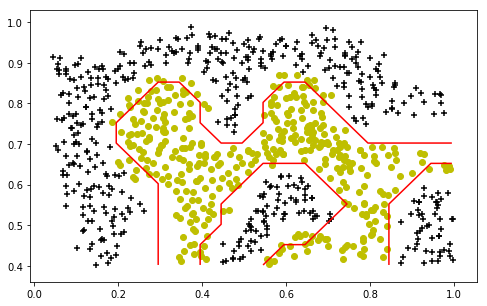

In [78]:
plotdata(x,y)
printdecisionboundry(x,clf)

<h3> Choosing RBF kernel parameters through cross validation

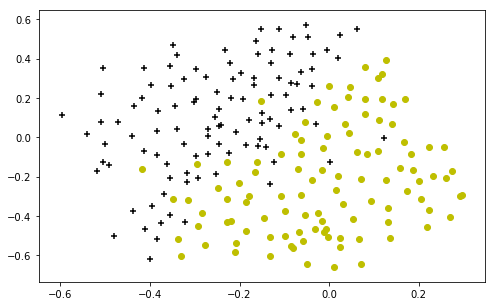

In [79]:
data1_dict = scipy.io.loadmat('ex6/ex6data3.mat')
x = data1_dict['X']
y= data1_dict['y']
plotdata(x,y)
#print pformat(data1_dict)

In [80]:
xval =  data1_dict['Xval']
yval =  data1_dict['yval']

In [81]:
def optparam(x,y,xval,yval):
    C = np.array([0.01,0.1,1,10])
    sigma = 1./(2*C*C)
    
    emin  = 1
    etmin = 1
    copt = 0
    gopt = 0
    ctrain = 0
    gtrain = 0
    for c in C:
        for g in sigma:
            clf = svm.SVC(C=c,kernel='rbf',gamma=g)
            clf.fit(x,y.reshape(len(x)))
            predict_train = clf.predict(x)
            predict_val = clf.predict(xval)
            y1 = y.reshape(predict_train.shape)
            yval1 = yval.reshape(predict_val.shape)
            e_train = float((predict_train != y1).sum())/len(y)
            e_val = float((predict_val != yval1).sum())/len(yval)
            
            
            if e_val < emin:
                emin = e_val
                copt=c
                gopt=g
                
            if e_train <= etmin:
                etmin = e_train
                ctrain = c
                gtrain =g 
                
                
    return copt,gopt,ctrain,gtrain 

In [82]:
(copt,gopt,c,g)=optparam(x,y,xval,yval)
print c,g

10.0 5000.0


<h3> Plotting decision boundries on the training dataset and then on the validation data set

Now we will plot decision boundries using C and gamma parametes those gave minimum error on the validation data and training data respectively. We see C and gamma parameters those give minimum error on the validation data makes a nice decision boundry both on the training and validation data sets. However, C and gamma paramters those give minimum error on the training set makes wiggly decision boundries bothe on training and validation data sets

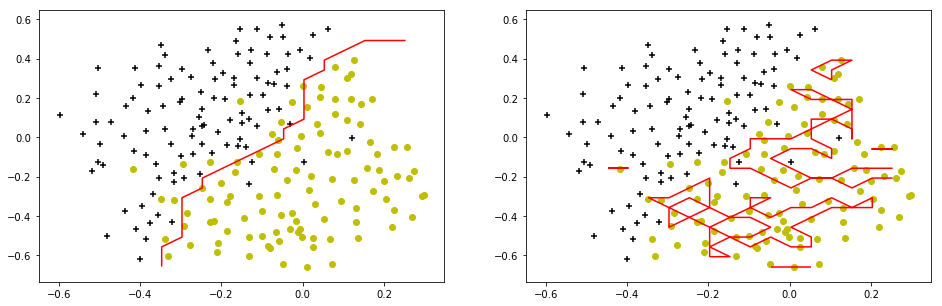

In [52]:
plt.subplot(1,2,1)
clf = svm.SVC(C=copt,kernel='rbf',gamma=gopt)
clf.fit(x,y.reshape(len(x)))
plotdata(x,y)
printdecisionboundry(x,clf)
plt.subplot(1,2,2)
clf = svm.SVC(C=c,kernel='rbf',gamma=g)
clf.fit(x,y.reshape(len(x)))
plotdata(x,y)
printdecisionboundry(x,clf)

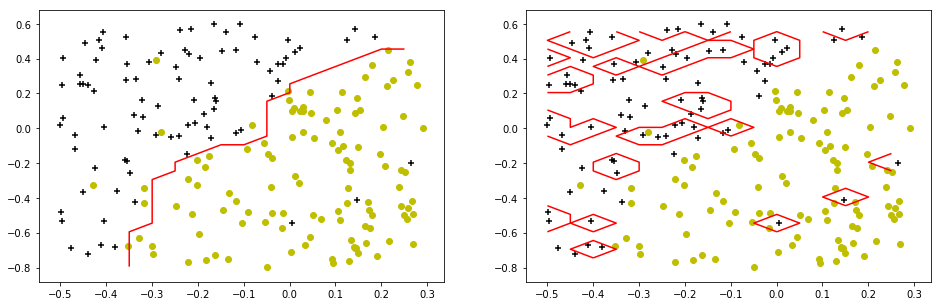

In [53]:
plt.subplot(1,2,1)
clf = svm.SVC(C=copt,kernel='rbf',gamma=gopt)
clf.fit(xval,yval.reshape(len(xval)))
plotdata(xval,yval)
printdecisionboundry(xval,clf)
plt.subplot(1,2,2)
clf = svm.SVC(C=c,kernel='rbf',gamma=g)
clf.fit(xval,yval.reshape(len(xval)))
plotdata(xval,yval)
printdecisionboundry(xval,clf)